# Linear Regression Manual Implementation

The goal of linear regression is to find the best-fitting straight line (ŷ = mx + b) through the data, where:

ŷ = the predicted output (dependent variable)
x = the input feature (independent variable)
m = the slope (how much y changes with x)
b = the intercept (where the line crosses the y-axis).

---
As we mentioned on the [Brainstorming](https://www.notion.so/yafa/Week3-Delving-into-AI-Algorithms-1203ef6c2f398095bd63e3e0a5ac68d4?pvs=4#1203ef6c2f3980ee8115da7d0e02f36a) we have two different popular ways to implement LR "Least Squares Method,Gradient Descent Method"

## Part 1: LSM

Start From LSM we aim to directly calculate the slope (m) and intercept (b) that minimize the sum of squared differences between the actual and predicted values (the residuals).
This gives us the best-fitting line in one shot, **without iteration**.

we will do the following:
1. Calculate the Required Sums:

  `∑xi` (sum of input values),
  `∑yi`(sum of output values),
  `∑xi2`​(sum of squared input values),
  `∑xiyi`(sum of product of input and output values).

2. Calculate Slope (m) and Intercept (b):

  ```
  m = (n.∑xiyi - ∑xi * ∑yi) / (n * ∑xi2 - (∑xi ** 2))
  ```
  ```
  b = (∑yi - m * ∑xi) / n
  ```
  n: #of features
3. Make Predictions using the the equation `ŷi=m⋅xi+b`

In [ ]:
#assuming we have this simple data set (x and y values)
x = [1, 2, 3, 4, 5]  # input values
y = [3, 4, 2, 5, 6]  # output values

n = len(x)

# calculate the required sums then using them to calculate the slope and intercept:
sum_x = sum(x)
sum_y = sum(y)
sum_x_squared = sum([i**2 for i in x])
sum_xy = sum([i*j for i, j in zip(x, y)])

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - (sum_x ** 2))
b = (sum_y - m * sum_x) / n

# make predictions using the ŷ equation
y_pred = [m * x_i + b for x_i in x]

# print the result :
print(f"slope m: {m}")
print(f"intercept b: {b}")
print(f"predicted values: {y_pred}")

slope m: 0.7
intercept b: 1.9
predicted values: [2.5999999999999996, 3.3, 3.9999999999999996, 4.699999999999999, 5.4]


we can now calculate the sum of squared residuals (error)

In [ ]:
residuals = [y_i - y_pred_i for y_i, y_pred_i in zip(y, y_pred)]
squared_residuals = [r**2 for r in residuals]
error = sum(squared_residuals)

print(f"SSR: {error}")

SSR: 5.099999999999999


to evaluate the goodness of the model we want to calculate the r squared

In [ ]:
# calculate sst
y_mean = sum(y) / len(y)
sst = sum([(y_i - y_mean)**2 for y_i in y])

print(f"SST: {sst}")

SST: 10.0


In [ ]:
# r squared
r_squared = 1 - (error / sst)
print(f"R-squared: {r_squared}")

R-squared: 0.4900000000000001


value of 0.49 indicates that our model explains approximately 49% of the variance in the data. not strong model, but it’s also not necessarily a bad result depending on our data.

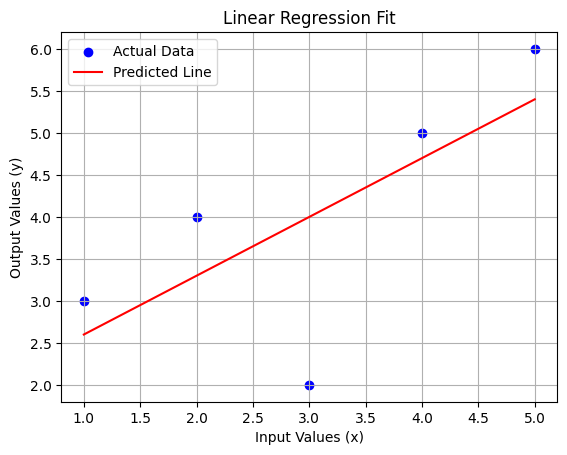

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Actual Data', marker='o')  # plot actual points
plt.plot(x, y_pred, color='red', label='Predicted Line')  # plot the regression line
plt.title('Linear Regression Fit')
plt.xlabel('Input Values (x)')
plt.ylabel('Output Values (y)')
plt.legend()
plt.grid()
plt.show()

## Part2: Gradient Descent Method

> Gradient descent is an iterative optimization algorithm used to minimize the loss function by updating the model parameters (slope m and intercept b) in the direction of the steepest descent. Unlike the Least Squares Method (LSM), which finds the optimal parameters in one step, gradient descent iteratively approaches the optimal values.

so we want to minimize the error (cost function) between the predicted values and the actual values.

linear regression cost function == Mean Squared Error (MSE)

we will do the following:
1. Initialize Parameters: start with initial guesses for the slope m and intercept b (often set to zero).
2. Set Learning Rate: define a small learning rate α that determines how much to adjust the parameters in each iteration.
3. Iteratively Update Parameters: For each iteration:
  - calculate predictions using the current m and b.
  - calculate the gradients (partial derivatives of the loss function with respect to m and b).
  - update m and b using the calculated gradients.
4. Stop Criterion: continue iterating until the change in m and b is small enough, or you have reached a predetermined number of iterations.

In [ ]:
# use the same dataset (x,y values)

# parameters
m = 0  # slope
b = 0  # intercept
learning_rate = 0.01  # step size
epochs = 1000  # number of iterations

n = len(x)  # Number of data points

# gd loop
for _ in range(epochs):
    # calculate predictions
    y_pred = [m * x_i + b for x_i in x]

    # calculate gradients
    dm = (-2/n) * sum((y[i] - y_pred[i]) * x[i] for i in range(n))  # gradient with respect to m
    db = (-2/n) * sum(y[i] - y_pred[i] for i in range(n))  # gradient with respect to b

    # update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

y_final_pred = [m * x_i + b for x_i in x]

# final slope and intercept
print(f"final slope m: {m}")
print(f"final intercept b: {b}")
print(f"predicted values: {y_final_pred}")

final slope m: 0.7148435629087723
final intercept b: 1.8464100280623261
predicted values: [2.5612535909710985, 3.2760971538798707, 3.990940716788643, 4.705784279697415, 5.420627842606187]


In [ ]:
# calculate SSR (Sum of Squared Residuals)
residuals = [y_i - y_pred_i for y_i, y_pred_i in zip(y, y_final_pred)]
squared_residuals = [r**2 for r in residuals]
ssr = sum(squared_residuals)

# calculate SST (Total Sum of Squares)
y_mean = sum(y) / len(y)
sst = sum([(y_i - y_mean)**2 for y_i in y])

# calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared: {r_squared}")


R-squared: 0.48973863333402157


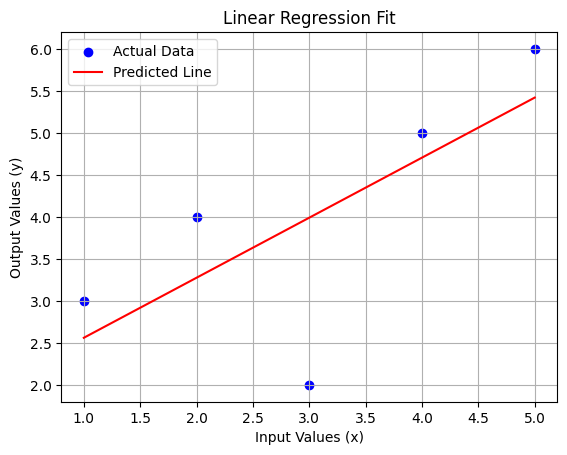

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Actual Data', marker='o')  # actual points
plt.plot(x, y_final_pred, color='red', label='Predicted Line')  # the regression line
plt.title('Linear Regression Fit')
plt.xlabel('Input Values (x)')
plt.ylabel('Output Values (y)')
plt.legend()
plt.grid()
plt.show()

we can manually add a quadratic term with some value change and implement polynomial regression to improve the fit


In [ ]:
# quadratic term
x2 = [i**2 for i in x]

learning_rate = 0.001  # learning rate
n_iterations = 10000   # epochs

m = 0.01  # for linear term
m2 = 0.01  # for quadratic term
b = 0
n = len(x)

# gd loop
for iteration in range(n_iterations):
    # predictions
    y_pred = [m2 * x2_i + m * x_i + b for x2_i, x_i in zip(x2, x)]


    # gradients
    dm2 = (-2/n) * sum((y[i] - y_pred[i]) * x2[i] for i in range(n))  # for x^2 term
    dm = (-2/n) * sum((y[i] - y_pred[i]) * x[i] for i in range(n))    # for x term
    db = (-2/n) * sum(y[i] - y_pred[i] for i in range(n))             # for intercept

    # update parameters
    m2 -= learning_rate * dm2
    m -= learning_rate * dm
    b -= learning_rate * db

# predictions with the final coefficients
y_final_pred = [m2 * x2_i + m * x_i + b for x2_i, x_i in zip(x2, x)]
print(f"Final predictions: {y_final_pred}")

# SSR
residuals = [y_i - y_pred_i for y_i, y_pred_i in zip(y, y_final_pred)]
squared_residuals = [r**2 for r in residuals]
ssr = sum(squared_residuals)
print(f"SSR: {ssr}")

# SST
y_mean = sum(y) / len(y)
sst = sum([(y_i - y_mean)**2 for y_i in y])
print(f"SST: {sst}")

# R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared: {r_squared}")

Final predictions: [2.5818280274350025, 3.0143921860068303, 3.695414832736925, 4.624895967625285, 5.802835590671911]
SSR: 4.2002988561171355
SST: 10.0
R-squared: 0.5799701143882865


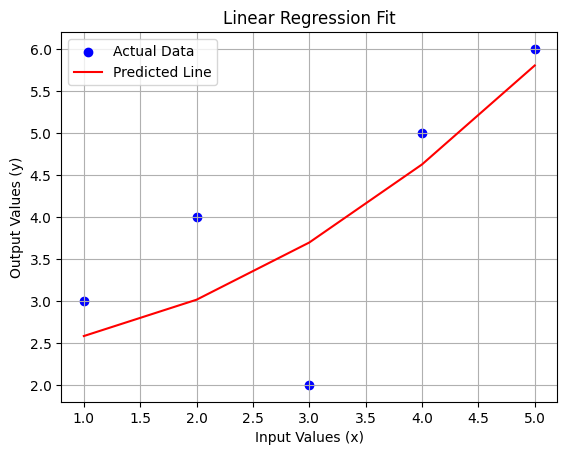

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue', label='Actual Data', marker='o')  # actual points
plt.plot(x, y_final_pred, color='red', label='Predicted Line')  # the regression line
plt.title('Linear Regression Fit')
plt.xlabel('Input Values (x)')
plt.ylabel('Output Values (y)')
plt.legend()
plt.grid()
plt.show()

everything worked well.. the R-squared value increased.

# Decision Tree Manual Implementation

The goal is to recursively split the data into smaller regions such that the error is minimized.

⇒ regression trees use Mean Squared Error (MSE) or Mean Absolute Error (MAE) as the criterion for splitting.

⇒ we stop splitting either when the regions become too small or when the reduction in error is not significant.

so we will :
1. calculate the split points: for each feature, try splitting the dataset at every possible value and calculate the resulting MSE.
2. select the best split: choose the split that minimizes the error.
3. repeat: continue splitting the data until the stopping criterion is met.



In [ ]:
# single split:

x = [1, 2, 3, 4, 5]  # input values
y = [3, 4, 2, 5, 6]  # output values

def calculate_mse(y_values):
    mean_y = sum(y_values) / len(y_values)
    mse = sum((yi - mean_y) ** 2 for yi in y_values) / len(y_values)
    return mse

def find_best_split(x, y):
    n = len(x)
    best_mse = float('inf')
    best_split = None

    # splitting at each value of x
    for i in range(1, n):
        left_y = y[:i]
        right_y = y[i:]

        mse_left = calculate_mse(left_y)
        mse_right = calculate_mse(right_y)

        total_mse = (len(left_y) / n) * mse_left + (len(right_y) / n) * mse_right

        if total_mse < best_mse:
            best_mse = total_mse
            best_split = i

    return best_split, best_mse

best_split, best_mse = find_best_split(x, y)

print(f"best split is at {best_split} with a Mean Squared Error of {best_mse}")

# predicted values based on the best split found
y_pred = [sum(y[:best_split]) / len(y[:best_split])] * best_split + [sum(y[best_split:]) / len(y[best_split:])] * (len(y) - best_split)
y_pred

best split is at 3 with a Mean Squared Error of 0.5


[3.0, 3.0, 3.0, 5.5, 5.5]

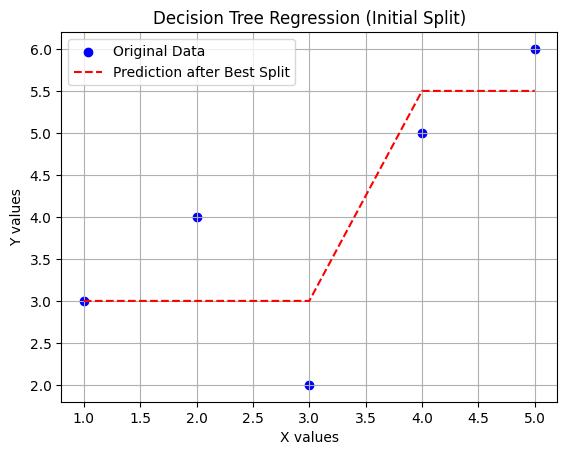

In [ ]:
plt.scatter(x, y, color='blue', label="Original Data")
plt.plot(x, y_pred, color='red', label="Prediction after Best Split", linestyle='--')

plt.title("Decision Tree Regression (Initial Split)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# SSR
residuals = [y_i - y_pred_i for y_i, y_pred_i in zip(y, y_pred)]
squared_residuals = [r**2 for r in residuals]
ssr = sum(squared_residuals)

# SST
y_mean = sum(y) / len(y)
sst = sum([(y_i - y_mean)**2 for y_i in y])

# R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared: {r_squared}")

R-squared: 0.75


In [ ]:
# represent a node in the Decision Tree
class DecisionTreeNode:
    def __init__(self, split_value=None, left=None, right=None, value=None):
        self.split_value = split_value
        self.left = left                 # left child
        self.right = right               # right child
        self.value = value               # avg value for leaf nodes

# recursive to build the Decision Tree
def build_decision_tree(x, y, depth=0, max_depth=3):
    if len(y) < 2 or depth >= max_depth:
        return DecisionTreeNode(value=sum(y) / len(y))  # create a leaf node with the average value

    # find the best split
    best_split, best_mse = find_best_split(x, y)

    if best_split is None:
        return DecisionTreeNode(value=sum(y) / len(y))

    # split the data into left and right based on the best split
    left_x = x[:best_split]
    left_y = y[:best_split]
    right_x = x[best_split:]
    right_y = y[best_split:]

    # average of the two adjacent points
    split_value = (x[best_split - 1] + x[best_split]) / 2

    left_child = build_decision_tree(left_x, left_y, depth + 1, max_depth)
    right_child = build_decision_tree(right_x, right_y, depth + 1, max_depth)

    # node with the split value and left/right children
    return DecisionTreeNode(split_value=split_value, left=left_child, right=right_child)

# make predictions with the Decision Tree
def predict(tree, x):
    if tree.left is None and tree.right is None:  # leaf node
        return tree.value
    if x < tree.split_value:
        return predict(tree.left, x)
    else:
        return predict(tree.right, x)

# build the decision tree
tree = build_decision_tree(x, y)

# test the prediction function
test_values = [1.5, 2.5, 3.5, 4.5]
predictions = [predict(tree, value) for value in test_values]

# print predictions
for value, pred in zip(test_values, predictions):
    print(f"Predicted value for {value}: {pred}")

Predicted value for 1.5: 4.0
Predicted value for 2.5: 2.0
Predicted value for 3.5: 5.0
Predicted value for 4.5: 6.0


In [ ]:
def calculate_r_squared(y, y_pred):
    y_mean = sum(y) / len(y)
    ssr = sum((y_i - y_pred_i) ** 2 for y_i, y_pred_i in zip(y, y_pred))

    sst = sum((y_i - y_mean) ** 2 for y_i in y)

    if sst == 0:
        return 1 if ssr == 0 else 0

    r_squared = 1 - (ssr / sst)
    return r_squared

y_final_pred = [predict(tree, x_i) for x_i in x]

r_squared = calculate_r_squared(y, y_final_pred)

print(f"R-squared: {r_squared}")

R-squared: 1.0


how to improve?
- we can avoid overffiting by limiting the depth of the tree
+ implement a simple train/test split

In [ ]:
# modified recursive function to build the DT with depth control and min_samples_per_leaf
def build_decision_tree(x, y, depth=0, max_depth=3, min_samples_per_leaf=1):
    if len(y) <= min_samples_per_leaf or depth >= max_depth:
        return DecisionTreeNode(value=sum(y) / len(y))  # Create a leaf node with the average value

    best_split, best_mse = find_best_split(x, y)

    if best_split is None:
        return DecisionTreeNode(value=sum(y) / len(y))

    left_x = x[:best_split]
    left_y = y[:best_split]
    right_x = x[best_split:]
    right_y = y[best_split:]

    left_child = build_decision_tree(left_x, left_y, depth + 1, max_depth, min_samples_per_leaf)
    right_child = build_decision_tree(right_x, right_y, depth + 1, max_depth, min_samples_per_leaf)

    split_value = (x[best_split - 1] + x[best_split]) / 2

    return DecisionTreeNode(split_value=split_value, left=left_child, right=right_child)

In [ ]:
# train/test split function
def train_test_split(x, y, test_size=0.2):
    split_index = int(len(x) * (1 - test_size))
    return x[:split_index], x[split_index:], y[:split_index], y[split_index:]

x_train, x_test, y_train, y_test = train_test_split(x, y)

tree = build_decision_tree(x_train, y_train)

y_test_pred = [predict(tree, x_i) for x_i in x_test]

r_squared_test = calculate_r_squared(y_test, y_test_pred)
print(f"R-squared on Test Set: {r_squared_test}")


R-squared on Test Set: 0


In [ ]:
y_final_pred = [predict(tree, x_i) for x_i in x]

r_squared_total = calculate_r_squared(y, y_final_pred)
print(f"R-squared on Entire Dataset: {r_squared_total}")


R-squared on Entire Dataset: 0.9


# KNN Regression Manual Implementation

- Predicts the value of a point based on the k nearest neighbors from the training data.
- It looks at the k closest points (in distance) and then averages their values to make a prediction.
- The "closeness" or distance is typically measured using Euclidean distance.

So, we'll:
1. Calculate Distance: Find the distance between the new point and all the points in the training data.
2. Find Nearest Neighbors: Sort the distances and select the k-nearest points.
3. Predict Value: Take the average of the values (targets) of these nearest neighbors.

In [ ]:
def euclidean_distance(x1, x2):
    return abs(x1 - x2)

def knn_regression(x_train, y_train, x_new, k=3):
    # distances between x_new and all training points
    distances = [(euclidean_distance(x_new, x_i), y_i) for x_i, y_i in zip(x_train, y_train)]

    # sort select the k closest neighbors
    distances.sort(key=lambda pair: pair[0])
    k_nearest_neighbors = distances[:k]

    # avg the target values of the k nearest neighbors
    avg_value = sum(y for _, y in k_nearest_neighbors) / k
    return avg_value

x_train = [1, 2, 3, 4, 5]
y_train = [3, 4, 2, 5, 6]
x_new = 2.5

prediction = knn_regression(x_train, y_train, x_new, k=3)
print(f"Prediction for {x_new}: {prediction}")

Prediction for 2.5: 3.0


In [ ]:
test_points = [1.5, 2.5, 3.5, 4.5]
predictions = [knn_regression(x_train, y_train, x_new, k=3) for x_new in test_points]

print(f"Predictions: {predictions}")

Predictions: [3.0, 3.0, 3.6666666666666665, 4.333333333333333]


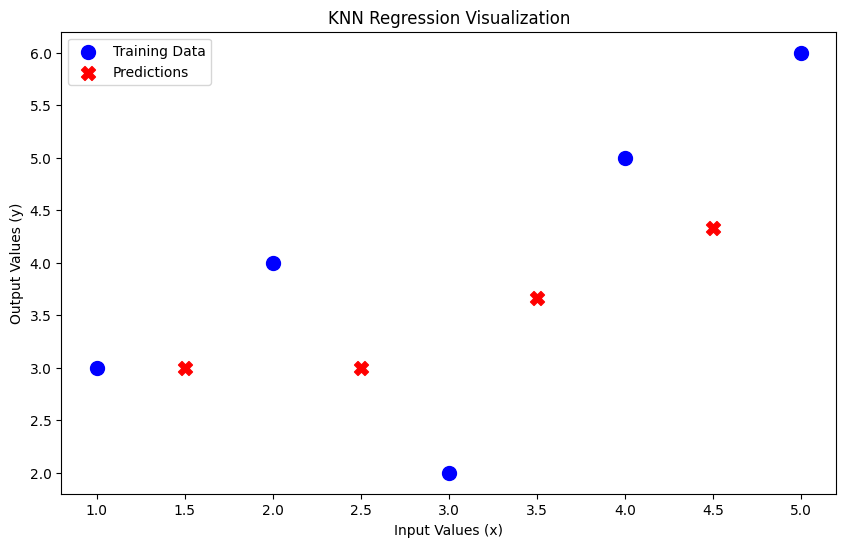

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data', s=100)
plt.scatter(test_points, predictions, color='red', label='Predictions', s=100, marker='X')
plt.title('KNN Regression Visualization')
plt.xlabel('Input Values (x)')
plt.ylabel('Output Values (y)')
plt.legend()
plt.show()

# Logistic Regression Manual Implementation

- **Logistic regression** uses the logistic function to model the probability of a binary outcome (0 or 1).
- The output is transformed using the sigmoid function, which maps any real-valued number into the range (0, 1).

we will do the following:

1. Define the Sigmoid Function & Initialize Parameters
2. Implement the Gradient Descent Algorithm
3. Train the Model
4. Make Predictions
5. Evaluate the Model

In [ ]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# update weights and bias using gradient descent
def update_weights(X, y, weights, bias, learning_rate):
    n = len(y)  # number of samples
    for i in range(n):
        z = sum(weights[j] * X[i][j] for j in range(len(weights))) + bias
        prediction = sigmoid(z)
        error = prediction - y[i]

        # update weights
        for j in range(len(weights)):
            weights[j] -= learning_rate * error * X[i][j] / n

        # update bias
        bias -= learning_rate * error / n

    return weights, bias

def train(X, y, weights, bias, learning_rate, epochs):
    for _ in range(epochs):
        weights, bias = update_weights(X, y, weights, bias, learning_rate)
    return weights, bias

def predict(X, weights, bias):
    z = sum(weights[j] * X[j] for j in range(len(weights))) + bias
    return 1 if sigmoid(z) >= 0.5 else 0

In [ ]:
X_train = [[0, 0], [0, 1], [1, 0], [1, 1]]  # input features
y_train = [0, 1, 1, 0]  # output labels (binary)

num_features = len(X_train[0])
weights = [0.0] * num_features
bias = 0.0
learning_rate = 0.1
epochs = 1000

weights, bias = train(X_train, y_train, weights, bias, learning_rate, epochs)

for x in X_train:
  prediction = predict(x, weights, bias)
  print(f"Input: {x}, Prediction: {prediction}, True Label: {y_train[X_train.index(x)]}")

Input: [0, 0], Prediction: 1, True Label: 0
Input: [0, 1], Prediction: 0, True Label: 1
Input: [1, 0], Prediction: 0, True Label: 1
Input: [1, 1], Prediction: 0, True Label: 0


bad result, how to improve the model ?
- Increase epochs for better convergence
- Add polynomial features

In [ ]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def update_weights(X, y, weights, bias, learning_rate):
    n = len(y)
    for i in range(n):
        z = sum(weights[j] * X[i][j] for j in range(len(weights))) + bias
        prediction = sigmoid(z)
        error = prediction - y[i]

        for j in range(len(weights)):
            weights[j] -= learning_rate * error * X[i][j] / n

        bias -= learning_rate * error / n

    return weights, bias

def train(X, y, weights, bias, learning_rate, epochs):
    for _ in range(epochs):
        weights, bias = update_weights(X, y, weights, bias, learning_rate)
    return weights, bias

def predict(X, weights, bias):
    z = sum(weights[j] * X[j] for j in range(len(weights))) + bias
    return 1 if sigmoid(z) >= 0.5 else 0

def create_polynomial_features(X):
    return [[x[0], x[1], x[0] * x[1], x[0] ** 2, x[1] ** 2] for x in X]

In [ ]:
X_train = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train = [0, 1, 1, 0]

X_poly = create_polynomial_features(X_train)

num_features = len(X_poly[0])
weights = [0.0] * num_features
bias = 0.0
learning_rate = 0.1
epochs = 10000

weights, bias = train(X_poly, y_train, weights, bias, learning_rate, epochs)

for x in X_poly:
  prediction = predict(x, weights, bias)
  print(f"Input: {x}, Prediction: {prediction}, True Label: {y_train[X_poly.index(x)]}")

Input: [0, 0, 0, 0, 0], Prediction: 0, True Label: 0
Input: [0, 1, 0, 0, 1], Prediction: 1, True Label: 1
Input: [1, 0, 0, 1, 0], Prediction: 1, True Label: 1
Input: [1, 1, 1, 1, 1], Prediction: 0, True Label: 0
